In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pk

pathGit = "c:/Git_proyects/Tesis/Embbedings_Lkvec/"
path = "c:/Facultad/Tesis/"
Lkvec = pd.read_csv(path+'Lkvec_all_in.csv')

In [5]:
Lkvec_unique = Lkvec.drop_duplicates(subset=['phrase'])


In [40]:
#path = "c:/Git-Proyects/Tesis/"

c_nuevo = pk.load(open(pathGit+'clusters_threshold_75_22.pk', 'rb'))
phr = pk.load(open(path+'phrases_to_emb.pickle', 'rb'))
Lkvec_unique['id_cluster'] = np.nan

C:\Users\Asus\AppData\Local\Temp\ipykernel_18780\4061795512.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lkvec_unique['id_cluster'] = np.nan


In [41]:
indice_frases = {i: j for j, i in enumerate(Lkvec_unique['phrase'])}
for i, clus in enumerate(c_nuevo):
    Lkvec_unique.loc[Lkvec_unique['phrase'].isin([Lkvec_unique['phrase'][indice_frases[j]] for j in clus]), 'id_cluster'] = str(i+1)

#for i, clus in enumerate(c_nuevo):
#    for j in clus:
#        Lkvec_unique.loc[Lkvec_unique['phrase'] == phr[j], 'id_cluster'] = str(i+1)

KeyError: 35

In [63]:
cluster_mapping = {phr[j]: str(i+1) for i, clus in enumerate(c_nuevo) for j in clus}
cluster_mapping
Lkvec_unique['id_cluster'] = Lkvec_unique['phrase'].map(cluster_mapping)
Lkvec_unique

C:\Users\Asus\AppData\Local\Temp\ipykernel_18780\1356513234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lkvec_unique['id_cluster'] = Lkvec_unique['phrase'].map(cluster_mapping)


,time,frequency,media,phrase,root,id,id_cluster,indice_frases,valor
0,2008-08-18 18:31:45,3,B,kind of creepy,it's kind of creepy to think that that many pe...,1785689,66394,0,66394
11,2008-09-25 22:03:51,1,M,it's kind of creepy,it's kind of creepy to think that that many pe...,1785689,587,1,587
78,2008-11-10 18:50:24,1,B,it's kind of creepy to think that that many pe...,it's kind of creepy to think that that many pe...,1785689,124169,2,124169
90,2008-09-24 04:43:54,1,M,we support all research that would further the...,we support all research that would further the...,1117502,59490,3,59490
161,2008-09-24 17:14:33,1,M,we support all research that would further the...,we support all research that would further the...,1117502,59490,4,59490
...,...,...,...,...,...,...,...,...,...
7665043,2008-12-15 21:51:32,1,M,the current cholera epidemic is only the most ...,the current cholera epidemic is only the most ...,2222921,37251,310452,37251
7665076,2008-12-15 23:37:35,1,M,the current cholera epidemic is only the most ...,the current cholera epidemic is only the most ...,2222921,37251,310453,37251
7665095,2008-09-05 17:08:04,1,B,and then click,option and then click on the,1686328,12987,310454,12987
7665100,2008-11-02 21:35:41,2,B,and then click on the,option and then click on the,1686328,12987,310455,12987


In [53]:
import itertools

def calculate_rand_index(partitionA, partitionB):
    n = len(partitionA)
    a = 0  # Pares concordantes en la misma partición en ambas agrupaciones
    b = 0  # Pares concordantes en particiones diferentes en ambas agrupaciones

    for i in range(n-1):
        for j in range(i+1, n):
            if (partitionA[i] == partitionA[j]) and (partitionB[i] == partitionB[j]):
                a += 1
            elif (partitionA[i] != partitionA[j]) and (partitionB[i] != partitionB[j]):
                b += 1

    combinations = list(itertools.combinations(range(n), 2))
    num_combinations = len(combinations)

    rand_index = (a + b) / num_combinations
    return rand_index

In [92]:
from sklearn.metrics import adjusted_rand_score

Lkvec_ids = np.array(Lkvec_unique['id'])
Clusters_ids = np.array(Lkvec_unique['id_cluster'])


rand_index = adjusted_rand_score(Lkvec_ids, Clusters_ids)

#calculate_rand_index(Lkvec_ids, Clusters_ids)

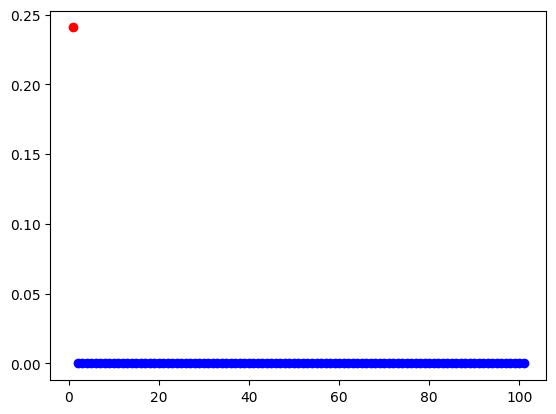

In [96]:
Lkvec_ids = np.array(Lkvec_unique['id'])
Clusters_ids = np.array(Lkvec_unique['id_cluster'])
rand_indexs = [adjusted_rand_score(Lkvec_ids, Clusters_ids)]
xs = np.arange(1,102)
plt.plot(xs[0], rand_indexs, 'ro', label = 'Clustring')
for i in range(100):
    np.random.shuffle(Lkvec_ids)
    ri = adjusted_rand_score(Lkvec_ids, Clusters_ids)
    rand_indexs.append( ri)
    plt.plot(xs[i+1],ri, 'bo', label = 'Random Lkvec')
plt.show()

(array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-1.15585605e-05,  2.40772975e-02,  4.81661536e-02,  7.22550096e-02,
         9.63438657e-02,  1.20432722e-01,  1.44521578e-01,  1.68610434e-01,
         1.92699290e-01,  2.16788146e-01,  2.40877002e-01]),
 <BarContainer object of 10 artists>)

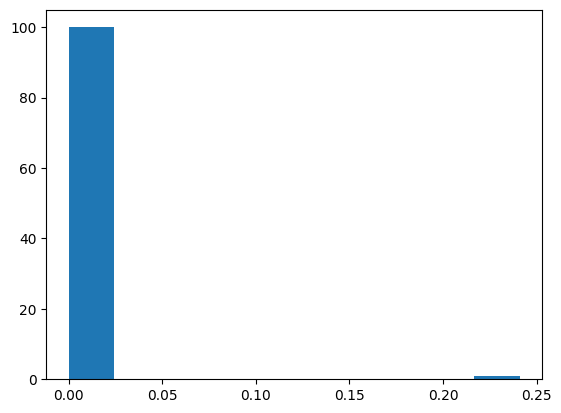

In [94]:
plt.hist(rand_indexs)